In [1]:
import keras  
import numpy as np
from pandas import read_csv,read_pickle
from sklearn.utils import shuffle
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential ,load_model
from keras.layers import Dense, Dropout, Flatten,RepeatVector
from keras.layers import Conv2D, MaxPooling2D,LSTM
from keras.callbacks import EarlyStopping 

#import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [2]:
#d_x = np.loadtxt("DATAX.csv",delimiter=',')
#d_y = np.loadtxt("DATAY.csv",delimiter=',',dtype=str)
db = read_pickle(r'dev_letter_D.p')

#Converting list to ndim array of shape (7702,3)
data = np.array(db, dtype=object)

samples = data.shape[0]
classes = 602

#Preparing the INPUT data
d_x= data[0][0].reshape((1,32,32,3))
for i in range(1,samples):
	data1= data[i][0].reshape((1,32,32,3))
	d_x = np.vstack((d_x,data1))

# Preparing the OUTPUT data
d_y= data[0][2]
for i in range(1,samples):
	data1= data[i][2]
	d_y = np.vstack((d_y,data1))
#d_y = d_y.reshape((samples,1))


# read an image

d_x = d_x.reshape(d_x.shape[0],-1)
#image_reshapeY = d_y.reshape()
print(np.shape(d_x))
print(np.shape(d_y))

(7702, 3072)
(7702, 1)


In [3]:
samples=len(d_y)

In [4]:

d_X = d_x.reshape(samples,32,32,3)
d_Y = d_y.reshape(samples,)
#x_train , y_train = d_x[0:round(samples*0.8)] ,d_y[0:round(samples*0.8)]
#x_test , y_test = d_x[round(samples*0.8):samples] , d_y[round(samples*0.8):samples]
#np.shape(y_train)
input_shape = (32 , 32 ,3)
#x_train = x_train.astype('float32') 
#x_test = x_test.astype('float32') 
#x_train /= 255 
#x_test /= 255
X_train = d_X.astype('float32') 
#x_test = d_x.astype('float32') 
X_train_sc = X_train/ 255 
#x_test /= 255
le = LabelEncoder()
le.fit(d_Y)
Y_train_enc = le.transform(d_Y)

In [5]:
X_train_sc.shape , Y_train_enc.shape

((7702, 32, 32, 3), (7702,))

In [6]:
max(Y_train_enc)

601

In [7]:

model = Sequential() 
model.add(Conv2D(200, kernel_size = (3, 3),activation = 'relu', input_shape = (input_shape))) 
model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 
model.add(Conv2D(200, kernel_size = (3, 3),activation = 'relu')) 
model.add(Conv2D(100, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten())

model.add(RepeatVector(2)) # RepeatVector is used to repeat the input for set number, n of times. RepeatVector with argument 16 is applied to layer having input shape as (batch_size, 32), then the output shape of the layer will be (batch_size, 16, 32)
model.add(LSTM(100,return_sequences=False, input_shape=(2,200), activation='relu'))
model.add(Dropout(0.25))
          
model.add(Dense(400, activation = 'relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(602,activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy,optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [8]:
# X_val=d_X[::-1]
# Y_val_enc=Y_train_enc[::-1]

X_val,y_val = shuffle(X_train_sc,Y_train_enc)
Y_train = keras.utils.to_categorical(Y_train_enc, 602) 
Y_val = keras.utils.to_categorical(y_val, 602)




In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 200)       5600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 200)       180200    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 100)        

In [14]:
model.fit(X_train_sc, Y_train , batch_size = 10, epochs = 40, verbose = 1,validation_data = (X_val,Y_val),callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)])


model.save("modelDCNN.h5")

Train on 7702 samples, validate on 7702 samples
Epoch 1/40
7702/7702 [==============================] - 47s 6ms/step - loss: 5.3816 - accuracy: 0.0344 - val_loss: 5.2436 - val_accuracy: 0.0439
Epoch 2/40
7702/7702 [==============================] - 39s 5ms/step - loss: 4.4417 - accuracy: 0.1737 - val_loss: 3.3624 - val_accuracy: 0.3835
Epoch 3/40
7702/7702 [==============================] - 18s 2ms/step - loss: 3.3362 - accuracy: 0.3751 - val_loss: 2.5423 - val_accuracy: 0.5056
Epoch 4/40
7702/7702 [==============================] - 17s 2ms/step - loss: 2.6935 - accuracy: 0.4965 - val_loss: 1.9235 - val_accuracy: 0.6520
Epoch 5/40
7702/7702 [==============================] - 17s 2ms/step - loss: 2.3378 - accuracy: 0.5714 - val_loss: 1.7627 - val_accuracy: 0.6822
Epoch 6/40
7702/7702 [==============================] - 17s 2ms/step - loss: 2.1286 - accuracy: 0.6102 - val_loss: 1.5791 - val_accuracy: 0.7205
Epoch 7/40
7702/7702 [==============================] - 17s 2ms/step - loss: 1.973

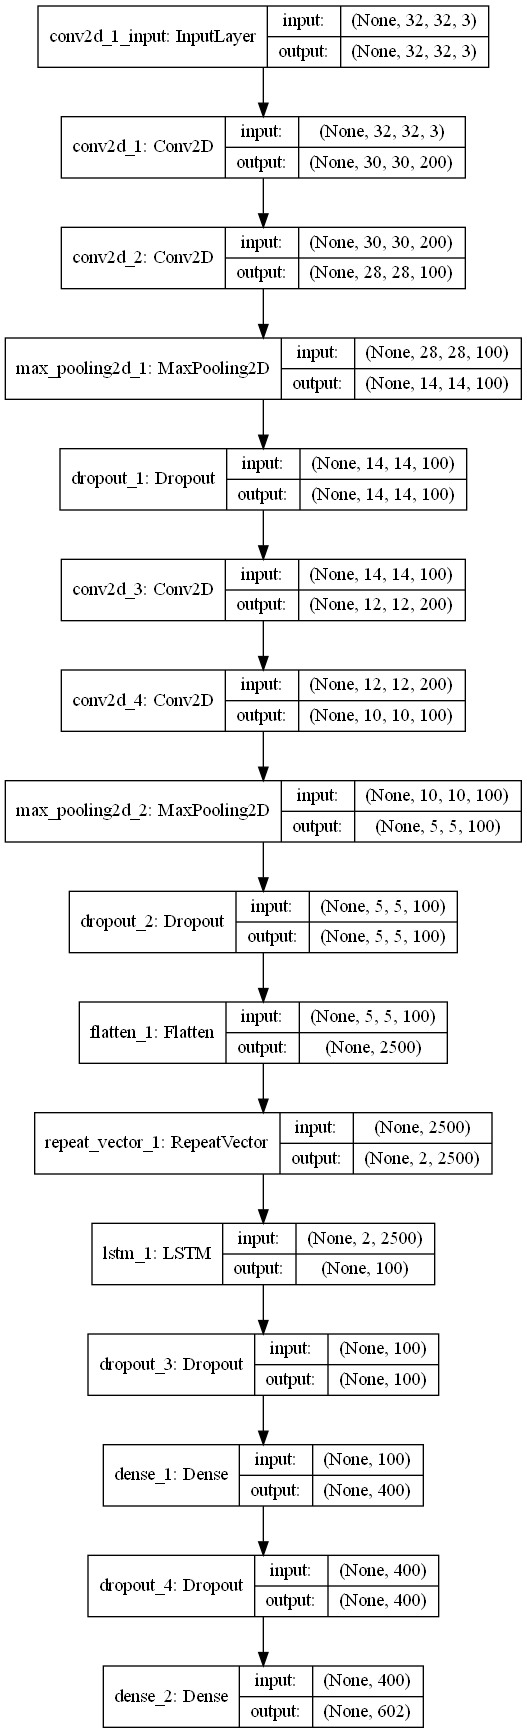

In [9]:
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [23]:
model = load_model("CNN_LSTM_89.h5")



X_test,Y_test = shuffle(X_train_sc+np.random.rand(1)/100, Y_train)
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
le = LabelEncoder()
le.fit(d_Y)
# Y_test_enc = le.transform(d_Y)
pred = model.predict(X_test[-15:-1]) 
prediction = np.argmax(pred, axis = 1)
label = np.argmax(Y_test,axis = 1)[-15:-1]
pred_ASCII = le.inverse_transform(prediction)
label_ASCII = le.inverse_transform(label)
print()
print(prediction) 
print(label)
print('\n')
print(pred_ASCII) 
print(label_ASCII)

7702/7702 [==============================] - 5s 672us/step
Test loss: 0.5097237353434898
Test accuracy: 0.899117112159729

[551 126 504 137 126 473 140 185 555 327   1 489  25  10]
[551 489 504 137 126 473 140 185 555 318   1 489  25  10]


['u' 'daa' 'ti' 'dha' 'daa' 'straa' 'dhi' 'haM' 'va' 'ntii' '!' 'ta' 'H'
 '?']
['u' 'ta' 'ti' 'dha' 'daa' 'straa' 'dhi' 'haM' 'va' 'nnau' '!' 'ta' 'H'
 '?']
